In [20]:
import pandas as pd #veriyi okuma
from sklearn.model_selection import train_test_split #train test ayırma
from sklearn.preprocessing import LabelEncoder #sex, bp, cholesterol için
from sklearn.tree import DecisionTreeClassifier #model
import matplotlib.pyplot as plt 
from sklearn import tree # plot_tree fonksiyonu

In [21]:
my_data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv', delimiter=",")

In [22]:
my_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


- *Multiclassifier 
- LabelEncoder()
- train_test_split
- DecisionTreeClassifier(criterion="entropy",)
- plot_tree()

In [23]:
my_data.shape

(200, 6)

In [24]:
my_data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [25]:
my_data['Drug'].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [26]:
#veriyi ayırma işlemi
x_data=my_data[[ 'Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K' ]]
y_data=my_data['Drug']

In [27]:
#label encoder işlemi
LabelEncoder=LabelEncoder()
x_data['Sex']=LabelEncoder.fit_transform(x_data['Sex'])
x_data['BP']=LabelEncoder.fit_transform(x_data['BP'])
x_data['Cholesterol']=LabelEncoder.fit_transform(x_data['Cholesterol'])

C:\Users\tubaa\AppData\Local\Temp\ipykernel_14072\2740274076.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_data['Sex']=LabelEncoder.fit_transform(x_data['Sex'])
C:\Users\tubaa\AppData\Local\Temp\ipykernel_14072\2740274076.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_data['BP']=LabelEncoder.fit_transform(x_data['BP'])
C:\Users\tubaa\AppData\Local\Temp\ipykernel_14072\2740274076.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [28]:
x_data

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


In [29]:
#train test olarak ayırma
x_train, x_test,  y_train, y_test=train_test_split(x_data, y_data, test_size=0.2)


In [30]:
#model oluşturma ve eğitme
decision_tree_model=DecisionTreeClassifier(criterion="entropy") #kriter olarak entropy kullanıldı
decision_tree_model.fit(x_train, y_train) #eğitim verileri fit edildi

DecisionTreeClassifier(criterion='entropy')

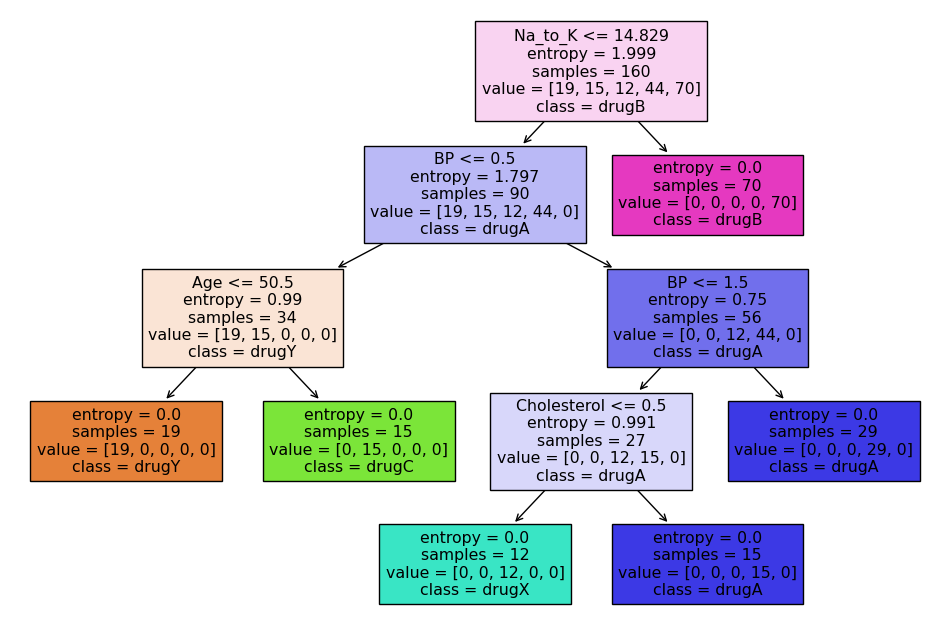

In [35]:
plt.figure(figsize=(12, 8))
from sklearn import tree
tree.plot_tree(decision_tree_model, feature_names=x_data.columns.tolist(), class_names=my_data['Drug'].unique().tolist(), filled=True)
plt.show()